Neural Network Example

The aim of this guide is to build a classification model to detect diabetes. We will be using the diabetes dataset which contains 768 observations and 9 variables, as described below:

    pregnancies - Number of times pregnant.
    glucose - Plasma glucose concentration.
    diastolic - Diastolic blood pressure (mm Hg).
    triceps - Skinfold thickness (mm).
    insulin - Hour serum insulin (mu U/ml).
    bmi – Basal metabolic rate (weight in kg/height in m).
    dpf - Diabetes pedigree function.
    age - Age in years.
    diabetes - “1” = presence of diabetes, “0” = absence of it. This is the target variable.

In [1]:
# Import required libraries

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor


# Import necessary modules

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score

In [14]:
path = 'E:\\Education\\Data\\'
file1 = path + 'diabetes.csv'
df = pd.read_csv(file1) 
print(df.shape)
df.columns = ['pregnancies', 'glucose', 'diastolic', 'triceps', 'insulin', 'bmi', 'dpf', 'age', 'diabetes']
df['diabetes'] = df.diabetes.astype(str)
df.describe().transpose()
df.dtypes

(768, 9)


pregnancies      int64
glucose          int64
diastolic        int64
triceps          int64
insulin          int64
bmi            float64
dpf            float64
age              int64
diabetes        object
dtype: object

Text(0, 0.5, 'Frequency')

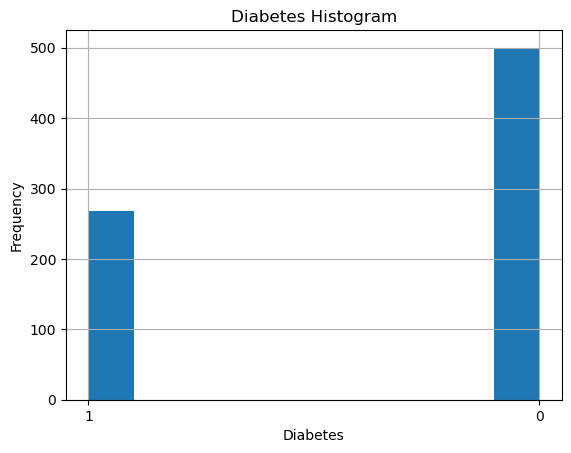

In [15]:
# More patients do not have diabetes will need to balance dataset
df.diabetes.hist()
plt.title('Diabetes Histogram')
plt.xlabel('Diabetes')
plt.ylabel('Frequency')

x1 :  500
x2 :  268


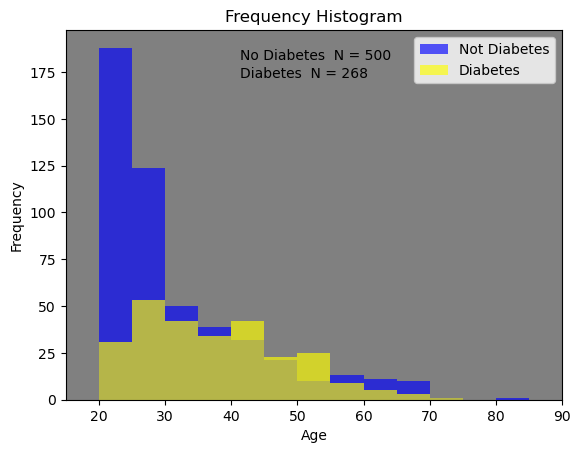

In [23]:
# Ages 25 - 40 were the buiggest purchasers
# It appeas that 25 - 30 was largest proportionof purchusers to non-purchasers

x1 = df.loc[df['diabetes'] == '0', 'age']
x2 = df.loc[df['diabetes'] == '1', 'age']

print('x1 : ',len(x1))
print('x2 : ',len(x2))

abins = range(5,90,5)
kwargs = dict(alpha=0.65, bins=abins)
ax = plt.axes(alpha=0)
ax.set_facecolor("grey")
plt.hist(x1, **kwargs, color='blue', label='Not Diabetes')
plt.hist(x2, **kwargs, color='yellow', label='Diabetes')


atext = 'No Diabetes  N = ' + str(len(x1))
btext = 'Diabetes  N = ' + str(len(x2))

ax.text(0.35, 0.95,atext, horizontalalignment='left', verticalalignment='top',transform=ax.transAxes)
ax.text(0.35, 0.90, btext, horizontalalignment='left', verticalalignment='top',transform=ax.transAxes)

plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Age');
plt.xlim(15,90)
plt.legend();

In [49]:
# EDA shows that diabetes caes are 50% of non-diabetes cases. Thgis balances the traigning dataset 
# SMOTE oversampling
X = df.loc[:, df.columns != 'diabetes']
y = df.loc[:, df.columns == 'diabetes']
# print(X)
# print(y)
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print('x_train: ', len(X_train), 'x_test: ', len(X_test), 'y_train: ', len(y_train), 'y_test: ', len(y_test))
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
print('os_data_X: ', len(os_data_X), 'os_data_y: ', len(os_data_y))
print(os_data_y.columns)
os_data_y= pd.DataFrame(data=os_data_y,columns=['diabetes'])
print(os_data_y[1:5])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no diabetes in oversampled data",len(os_data_y[os_data_y['diabetes']=='0']))
print("Number of diabetes",len(os_data_y[os_data_y['diabetes']=='1']))
print("Proportion of no diabetes data in oversampled data is ",len(os_data_y[os_data_y['diabetes']=='0'])/len(os_data_X))
print("Proportion of diabetes data in oversampled data is ",len(os_data_y[os_data_y['diabetes']=='1'])/len(os_data_X))

x_train:  537 x_test:  231 y_train:  537 y_test:  231
os_data_X:  686 os_data_y:  686
Index(['diabetes'], dtype='object')
  diabetes
1        0
2        0
3        1
4        1
length of oversampled data is  686
Number of no diabetes in oversampled data 343
Number of diabetes 343
Proportion of no diabetes data in oversampled data is  0.5
Proportion of diabetes data in oversampled data is  0.5


In [50]:
# Replaced the authors scaling technique with sklearn StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from pandas import DataFrame

trans = MinMaxScaler()
data1 = trans.fit_transform(os_data_X)
data2 = trans.transform(X_test)

# convert the array back to a dataframe
X_train_stan = DataFrame(data1, columns = X_train.columns)
X_test_stan = DataFrame(data2, columns = X_test.columns)
# summarize
X_train_stan[1:20]

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age
1,0.058824,0.419192,0.557377,0.000000,0.000000,0.271237,0.231164,0.100000
2,0.117647,0.616162,0.573770,0.272727,0.000000,0.548435,0.109589,0.100000
3,0.235294,0.737374,0.639344,0.000000,0.000000,0.573770,0.186644,0.766667
4,0.000000,0.621212,0.590164,0.000000,0.000000,0.540984,0.074486,0.516667
5,0.294118,0.525253,0.606557,0.000000,0.000000,0.429210,0.029538,0.450000
6,0.411765,0.767677,0.721311,0.444444,0.000000,0.745156,0.108305,0.250000
7,0.058824,0.505051,0.540984,0.292929,0.231678,0.476900,0.154110,0.350000
8,0.529412,0.858586,0.606557,0.313131,0.000000,0.655738,0.136558,0.366667
9,0.705882,0.444444,0.606557,0.404040,0.063830,0.526080,0.125856,0.450000
10,0.235294,0.666667,0.000000,0.000000,0.000000,0.490313,0.093322,0.033333


In [51]:
# Ths shows data is scaled with a mean very close to 0 nad SD close to 1
os_data_X_stan.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pregnancies,686.0,-1.035777e-16,1.00073,-1.169304,-0.881591,-0.306166,0.556971,3.721809
glucose,686.0,0.000000e+00,1.00073,-3.859003,-0.697240,-0.092448,0.642490,2.204233
diastolic,686.0,3.003752e-16,1.00073,-3.712556,-0.314185,0.110611,0.535407,2.765588
triceps,686.0,-6.473604e-17,1.00073,-1.306621,-1.306621,0.242214,0.737842,4.826767
insulin,686.0,3.625218e-17,1.00073,-0.722414,-0.722414,-0.374158,0.455022,6.292450
bmi,686.0,3.210907e-16,1.00073,-4.235999,-0.577814,0.018712,0.531328,4.363131
dpf,686.0,-7.768324e-17,1.00073,-1.182717,-0.682608,-0.263848,0.435389,5.708062
age,686.0,1.242932e-16,1.00073,-1.171513,-0.823985,-0.302694,0.653008,4.041403


In [52]:
# train and predict
# added ravel on fit based on error
# increases max_iter = 1500
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1500)
mlp.fit(X_train_stan,os_data_y.values.ravel())
predict_train = mlp.predict(X_train_stan)
predict_test = mlp.predict(X_test_stan)

In [53]:
# confusion matrix and classification report for training predictions
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(os_data_y,predict_train))
print(classification_report(os_data_y,predict_train))

[[  0 343]
 [  0 343]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       343
           1       0.50      1.00      0.67       343

    accuracy                           0.50       686
   macro avg       0.25      0.50      0.33       686
weighted avg       0.25      0.50      0.33       686



D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
# confusion matrix and classification report for test dataset predictions
print(confusion_matrix(y_test,predict_test))
print(classification_report(y_test,predict_test))

[[  0 157]
 [  0  74]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       157
           1       0.32      1.00      0.49        74

    accuracy                           0.32       231
   macro avg       0.16      0.50      0.24       231
weighted avg       0.10      0.32      0.16       231



D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\ProgramFiles\anaconda3\envs\research\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
